<a href="https://colab.research.google.com/github/fabnancyuhp/RENDUPYTHONISFSTAT/blob/master/Ex3EpsilonSupportVector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1 :

In [0]:
import pandas as pd 
rep = "C:/Users/kraepa19/Downloads/insurance.pkl"
DATA_assurance = pd.read_pickle(rep)
DATA_assurance

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [0]:
from sklearn.model_selection import train_test_split
var_feature = [o for o in DATA_assurance.columns if o!='charges']
X = DATA_assurance[var_feature]
Y = DATA_assurance['charges']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,\
random_state=2003)

Question 2 :

In [0]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X_train)
X_train_scal = scale.transform(X_train)
X_test_scal = scale.transform(X_test)

Question 3 :

In [0]:
from sklearn.svm import SVR
SVMR = SVR(kernel='linear', degree=3, C=200,gamma=0.08, epsilon=1)
SVMR.fit(X_train_scal,Y_train)

SVR(C=200, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma=0.08,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Question 4 :

In [0]:
from sklearn.metrics import r2_score
r2_score(Y_test,SVMR.predict(X_test_scal))

0.746032637386953

Question 5 :

In [0]:
from sklearn.svm import SVR
SVMRPOLY = SVR(kernel='poly', degree=3, C=800,gamma=0.08, epsilon=1)
SVMRPOLY.fit(X_train_scal,Y_train)

SVR(C=800, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma=0.08,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Question 6 :

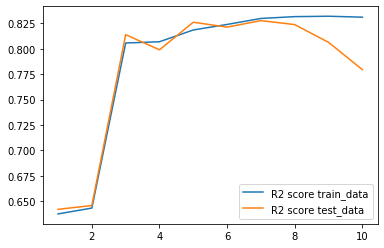

In [0]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.svm import SVR
res = []
for i in range(1,11):
    clf= SVR(kernel='poly' , degree = i, C=800 , epsilon=1 )
    clf.fit(X_train_scal,Y_train)
    resultat = [i,r2_score(Y_train,clf.predict(X_train_scal)),r2_score(Y_test,clf.predict(X_test_scal))]
    res.append(resultat)
r2_train = [o[1] for o in res]
r2_test = [o[2] for o in res]
axix = [o[0] for o in res]
import matplotlib.pyplot as plt
plt.plot(axix,r2_train,label="R2 score train_data")
plt.plot(axix,r2_test,label="R2 score test_data")
plt.legend(loc=4)
plt.show()